In [7]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics
from sklearn.metrics import confusion_matrix

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [12]:
#import dataset

df = pd.read_csv('bank.csv', sep =';')

In [14]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [22]:
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [16]:
df.shape

(4521, 17)

In [17]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

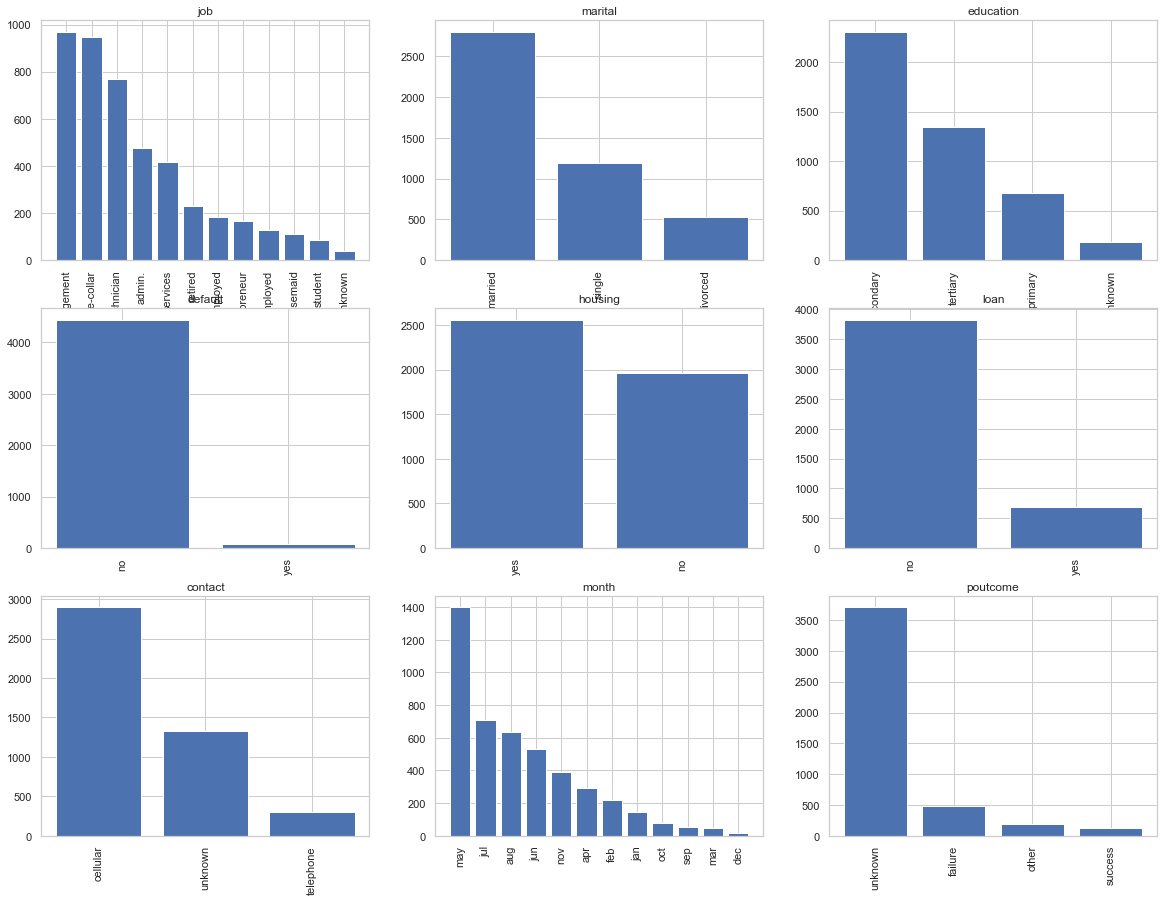

In [20]:
#separate the categories from quantitative vs qualitative 
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

In [ ]:
#Analysis
# Management is the highest in terms of Jobs
# Married people is the highest 
# Secondary education is the highest
# Most don't have loans yet
# More people doesn't have housing
# Most are contacted through cellular and in the month of May

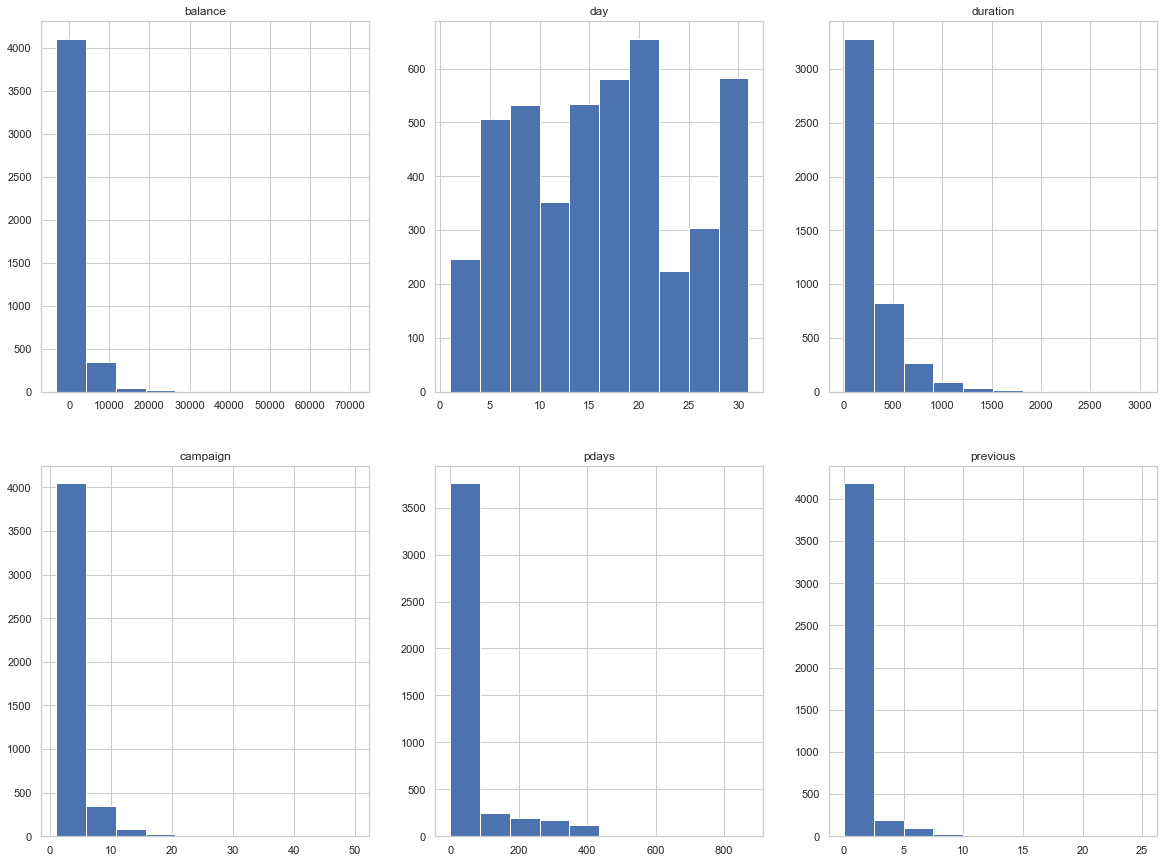

In [21]:
#quantitative columns to be visualized prior to modelling

num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [ ]:
# Analysis (most important ones to note)
# Most has 0 balance

In [23]:
df [['pdays', 'campaign', 'previous']].describe()

pdays     campaign     previous
count  4521.000000  4521.000000  4521.000000
mean     39.766645     2.793630     0.542579
std     100.121124     3.109807     1.693562
min      -1.000000     1.000000     0.000000
25%      -1.000000     1.000000     0.000000
50%      -1.000000     2.000000     0.000000
75%      -1.000000     3.000000     0.000000
max     871.000000    50.000000    25.000000

In [24]:
len (df[df['pdays'] > 400] ) / len(df) * 100

0.57509400575094

In [ ]:
#Note: pdays values above 400 is only 0.57% - possibly the outliers
# -1 not sure what it means

In [25]:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.04423800044238001

In [26]:
len (df[df['previous'] > 34] ) / len(df) * 100

0.0

<AxesSubplot:title={'center':'Deposit Value Counts'}>

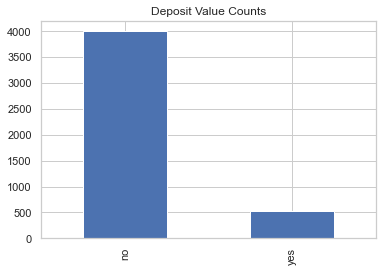

In [29]:
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'Deposit Value Counts')

In [30]:
df.rename(columns = {'y' : 'deposit'}, inplace=True)

In [31]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  cellular   19   oct        79         1     -1         0  unknown      no  
1  cellular   11   may       220         1    339         4  failure      no  
2  cellular   16   apr       185         1    330         1  failure      no  
3   unknown    3   jun       199         4     -1         0  unknown      no  
4   unknown    5   may       226         1     -1         0  unknown      no

<AxesSubplot:title={'center':'The correlation between Job and deposit'}>

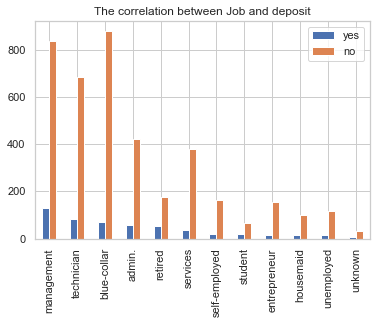

In [33]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'The correlation between Job and deposit')

<AxesSubplot:title={'center':'Correlation Between Marital status and deposit'}>

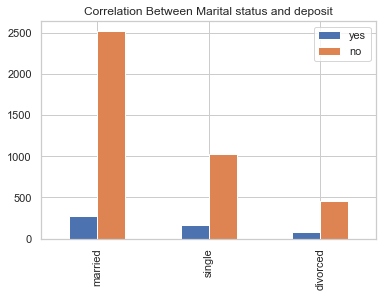

In [34]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Correlation Between Marital status and deposit')

<AxesSubplot:title={'center':'Correlation Between Education and deposit'}>

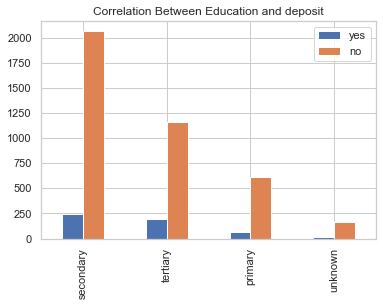

In [35]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Correlation Between Education and deposit')

<AxesSubplot:title={'center':'Type of contact and deposit'}>

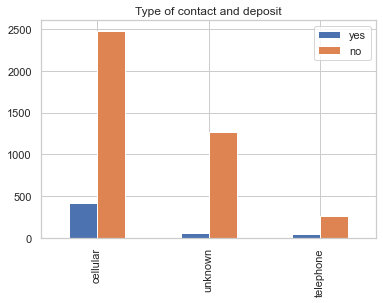

In [36]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

In [37]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = df.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [38]:
#clean the dataset
cleaned_df = clean_data(df)
cleaned_df.head()

age  balance  day  duration  default_bool  housing_bool  loan_bool  \
0   30     1787   19        79             0             0          0   
1   33     4789   11       220             0             1          1   
2   35     1350   16       185             0             1          0   
3   30     1476    3       199             0             1          1   
4   59        0    5       226             0             1          0   

   deposit_bool  job_blue-collar  job_entrepreneur  ...  month_mar  month_may  \
0             0                0                 0  ...          0          0   
1             0                0                 0  ...          0          1   
2             0                0                 0  ...          0          0   
3             0                0                 0  ...          0          0   
4             0                1                 0  ...          0          1   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0          0          1          0               0                 0   
1          0          0          0               0                 0   
2          0          0          0               0                 0   
3          0          0          0               0                 0   
4          0          0          0               0                 0   

   poutcome_unknown  campaign_cleaned  previous_cleaned  
0                 1               1.0                 0  
1                 0               1.0                 4  
2                 0               1.0                 1  
3                 1               4.0                 0  
4                 1               1.0                 0  

[5 rows x 42 columns]

In [51]:
x = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

In [52]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [ ]:
#Logistic Regression Model

In [61]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train.squeeze().values)

LR_pred = LR_Model.predict(X_test)
print(accuracy_score(y_test, LR_pred))
matrix = confusion_matrix (y_test, LR_pred)
print(matrix)

0.887988209285188
[[1167   38]
 [ 114   38]]


/Users/waqara-mbp-001/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
#KNN Model

KNN_Model = KNeighborsClassifier(n_neighbors=3)
KNN_Model.fit(X_train, y_train.squeeze().values)

KNN_pred = KNN_Model.predict(X_test)
print(accuracy_score(y_test, KNN_pred))
matrix1 = confusion_matrix (y_test, KNN_pred)
print(matrix1)

0.8725128960943257
[[1145   60]
 [ 113   39]]


In [64]:
# SVM Model

SVM_Model = SVC()
SVM_Model.fit(X_train, y_train.squeeze().values)

SVM_pred = SVM_Model.predict(X_test)
print(accuracy_score(y_test, SVM_pred))
matrix3 = confusion_matrix (y_test, SVM_pred)
print(matrix3)


0.8872512896094326
[[1204    1]
 [ 152    0]]


In [65]:
# DTree Model

DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train.squeeze().values)

DT_pred = DT_Model.predict(X_test)
print(accuracy_score(y_test, DT_pred))
matrix4 = confusion_matrix (y_test, DT_pred)
print(matrix4)

0.868828297715549
[[1110   95]
 [  83   69]]


In [67]:
# RForest Model

RF_Model = RandomForestClassifier()
RF_Model.fit(X_train, y_train.squeeze().values)

RF_pred = RF_Model.predict(X_test)
print(accuracy_score(y_test, RF_pred))
matrix5 = confusion_matrix (y_test, RF_pred)
print(matrix5)

0.8960943257184967
[[1177   28]
 [ 113   39]]


In [68]:
# NBayes Model

NB_Model = GaussianNB()
NB_Model.fit(X_train, y_train.squeeze().values)

NB_pred = NB_Model.predict(X_test)
print(accuracy_score(y_test, NB_pred))
matrix6 = confusion_matrix (y_test, NB_pred)
print(matrix6)

0.8481945467943994
[[1080  125]
 [  81   71]]


In [49]:
y.head()

deposit_bool
0             0
1             0
2             0
3             0
4             0

In [59]:
x.head()

age  balance  day  duration  default_bool  housing_bool  loan_bool  \
0   30     1787   19        79             0             0          0   
1   33     4789   11       220             0             1          1   
2   35     1350   16       185             0             1          0   
3   30     1476    3       199             0             1          1   
4   59        0    5       226             0             1          0   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_mar  \
0                0                 0              0  ...          0   
1                0                 0              0  ...          0   
2                0                 0              0  ...          0   
3                0                 0              0  ...          0   
4                1                 0              0  ...          0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          0          0          1          0               0   
1          1          0          0          0               0   
2          0          0          0          0               0   
3          0          0          0          0               0   
4          1          0          0          0               0   

   poutcome_success  poutcome_unknown  campaign_cleaned  previous_cleaned  
0                 0                 1               1.0                 0  
1                 0                 0               1.0                 4  
2                 0                 0               1.0                 1  
3                 0                 1               4.0                 0  
4                 0                 1               1.0                 0  

[5 rows x 41 columns]

In [60]:
print ("Logistic Regression", accuracy_score(y_test, LR_pred))
print("KNN:", accuracy_score(y_test, KNN_pred))
print("SVM:", accuracy_score(y_test, SVM_pred))
print("Decision Tree:", accuracy_score(y_test, DT_pred))
print("Random Forest:", accuracy_score(y_test, RF_pred))
print("Naive Bayes:" , accuracy_score(y_test, NB_pred))

Logistic Regression 0.887988209285188
KNN: 0.8725128960943257
SVM: 0.8872512896094326
Decision Tree: 0.8658806190125277
Random Forest: 0.8975681650700074
Naive Bayes: 0.8481945467943994


In [ ]:
#analysis: based on the multiple modelling types, although most of the numbers are close by, Random Forest has the highest accuracy number. 

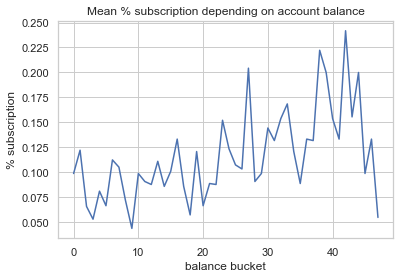

In [70]:
df_new = cleaned_df.copy()

#introduce new column 'balance_buckets' to  ''
df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = df_new.groupby(['balance_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()

In [71]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1269

In [ ]:
#from the diagram above we can conclude that the marketing campaign should focus on customers with account balance higher than $1269

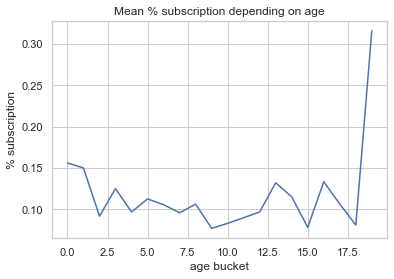

In [72]:
#introduce new column 'age_buckets' to  ''
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_age = df_new.groupby(['age_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('Mean % subscription depending on age')
plt.xlabel('age bucket')
plt.ylabel('% subscription')
plt.show()

In [73]:
df_new[df_new['age_buckets'] == 3]['age'].max()

32

In [74]:
df_new[df_new['age_buckets'] == 17]['age'].min()

54

In [ ]:
#analysis : the average subscription rate tends to be higher for customers above 32 years old to 54 Y.o. 